
# 5. Regularized Linear Regression and Bias vs Variance

In [2]:
import os 
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
import utils


%matplotlib inline

In [3]:
data=loadmat(os.path.join("Data","ex5data1.mat"))
data
X,y=data['X'],data['y'][:, 0]
Xtest, ytest=data['Xtest'],data['ytest'][:, 0]
Xval, yval= data['Xval'],data['yval'][:, 0]
m=y.size

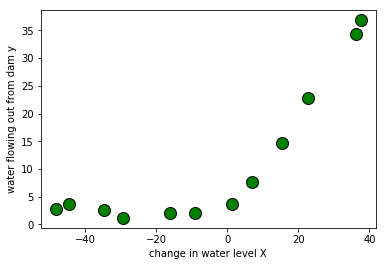

In [4]:
pyplot.plot(X,y,'go', linewidth=2, markersize=12, mec='k',mew=1)
pyplot.xlabel("change in water level X")
pyplot.ylabel("water flowing out from dam y");

### 1.2 Regularized linear regression cost function

Recall that regularized linear regression has the following cost function:

$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n \theta_j^2 \right)$$

where $\lambda$ is a regularization parameter

In [5]:
def linearRegCostFunction(X, y, theta, lambda_=0.0):
    m=y.size
    J=0
    grad=np.zeros(theta.shape)
    
    h=X.dot(theta)
    #h=X.dot(theta)
    
    
    
    J=(1/(2*m))*np.sum (np.square(h-y)) +lambda_/(2*m) * np.sum(np.square(theta[1:]))
    #J = (1 / (2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    
    grad= 1/m* (h-y).dot(X)
    #print (grad)
    grad[1:]=grad[1:]+(lambda_/m) *theta[1:]
    #print(grad)
    #print((lambda_/m) *theta[1:])
    return J, grad

### 1.3 Regularized linear regression gradient

Correspondingly, the partial derivative of the cost function for regularized linear regression is defined as:

$$
\begin{align}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} & \qquad \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \qquad \text{for } j \ge 1
\end{align}
$$

In [6]:
theta = np.array([1, 1])
J, _ = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)

print('Cost at theta = [1, 1]:\t   %f ' % J)
print('This value should be about 303.993192)\n' % J)

Cost at theta = [1, 1]:	   303.993192 
This value should be about 303.993192)



In [7]:
X_aug=np.concatenate([np.ones((m,1)),X],axis=1)
initial_theta=np.zeros(X_aug.shape[1])
lambda_=0.0
costFunction=lambda t: linearRegCostFunction(X_aug,y,t,lambda_)


In [8]:
res = optimize.minimize(costFunction,
                        initial_theta,
                        jac=True,
                        method='TNC',
                        options={'maxiter': 100})

### Fitting linear regression

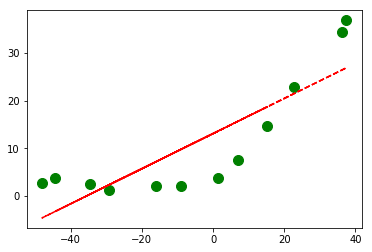

In [9]:
theta=res.x
pyplot.plot(X,y,'go',ms='10')
pyplot.plot(X,X_aug.dot(theta),'r--',ms='10');

In [106]:
a=lambda x: x*2


## 2 Bias-variance
### 2.1 Learning Curves
$$ J_{\text{train}} = \frac{1}{2m} \left[ \sum_{i=1}^m \left(h_\theta \left( x^{(i)} \right) - y^{(i)} \right)^2 \right] $$


In [152]:
def learningCurve(X, y, Xval, yval, lambda_=0):
    # Number of training examples
    m = y.size

    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val   = np.zeros(m)
    for i in range(1,m+1):
        print (i)
        Xa_=X[:i]
        ya=y[:i]
        
        #ya=np.array(ya)
        #ya.shape
        #Xa_=np.concatenate([np.ones((m,1)),Xa],axis=1)
        initial_theta=np.zeros(Xa_.shape[1])
        #lambda_=0.0
        costFunction=lambda t: linearRegCostFunction(Xa_,ya,t,lambda_)
        res = optimize.minimize(costFunction,
                        initial_theta,
                        jac=True,
                        method='TNC',
                        options={'maxiter': 100})
        theta_t=res.x
        
        #theta_t = utils.trainLinearReg(linearRegCostFunction, X[:i], y[:i], lambda_ = lambda_)
        
        error_train[i-1], _= linearRegCostFunction(Xa_,ya,theta_t,lambda_=0)
        
        
        error_val[i-1], _=linearRegCostFunction(Xval,yval,theta_t,lambda_=0)
        
    return error_train, error_val

1
2
3
4
5
6
7
8
9
10
11
12
# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368910
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


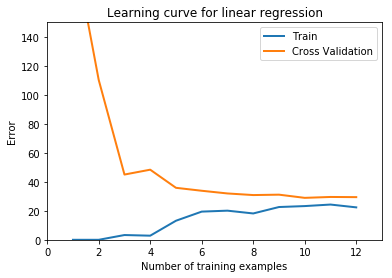

In [153]:
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
Xval_aug = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)
error_train, error_val = learningCurve(X_aug, y, Xval_aug, yval, lambda_=0)

pyplot.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
pyplot.title('Learning curve for linear regression')
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In [54]:
np.set_printoptions(suppress=True)


## 3 Polynomial regression

The problem with our linear model was that it was too simple for the data
and resulted in underfitting (high bias). In this part of the exercise, you will address this problem by adding more features. For polynomial regression, our hypothesis has the form:

$$
\begin{align}
h_\theta(x)  &= \theta_0 + \theta_1 \times (\text{waterLevel}) + \theta_2 \times (\text{waterLevel})^2 + \cdots + \theta_p \times (\text{waterLevel})^p \\
& = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_p x_p
\end{align}
$$

In [ ]:
p=5

X.shape[0]
Xpoly=np.zeros((X.shape[0],p))
for i in range(0,p):
    Xpoly[:,i]=X[:,0]**(i+1)


In [49]:
def polyFeatures(X, p):
    #p=5
    Xpoly=np.zeros((X.shape[0],p))
    
    for i in range(0,p):
        Xpoly[:,i]=X[:,0]**(i+1)

    return Xpoly

In [65]:
Xpoly=polyFeatures(X,9)
Xpoly

array([[-1.59367581e+01,  2.53980260e+02, -4.04762197e+03,
         6.45059724e+04, -1.02801608e+06,  1.63832436e+07,
        -2.61095791e+08,  4.16102047e+09, -6.63131769e+10],
       [-2.91529792e+01,  8.49896197e+02, -2.47770062e+04,
         7.22323546e+05, -2.10578833e+07,  6.13900035e+08,
        -1.78970150e+10,  5.21751305e+11, -1.52106050e+13],
       [ 3.61895486e+01,  1.30968343e+03,  4.73968522e+04,
         1.71527069e+06,  6.20748719e+07,  2.24646160e+09,
         8.12984311e+10,  2.94215353e+12,  1.06475208e+14],
       [ 3.74921873e+01,  1.40566411e+03,  5.27014222e+04,
         1.97589159e+06,  7.40804977e+07,  2.77743990e+09,
         1.04132297e+11,  3.90414759e+12,  1.46375033e+14],
       [-4.80588295e+01,  2.30965109e+03, -1.10999128e+05,
         5.33448815e+06, -2.56369256e+08,  1.23208064e+10,
        -5.92123532e+11,  2.84567638e+13, -1.36759876e+15],
       [-8.94145794e+00,  7.99496701e+01, -7.14866612e+02,
         6.39194974e+03, -5.71533498e+04,  5.110342

In [70]:
#aplikuje poly features do zbiorow treningowych i testowych
#wraz z normalizacja

p=9
Xpoly=polyFeatures(X,p)

for i in range(0,Xpoly.shape[1]): 
    Xpoly[:,i]=(Xpoly[:,i]-np.mean(Xpoly[:,i],axis=0))/np.std(Xpoly[:,i],axis=0,ddof=1)
   
Xpoly


array([[-0.36214078, -0.75508669,  0.18222588, -0.70618991,  0.30661792,
        -0.59087767,  0.3445158 , -0.50848117,  0.35954927],
       [-0.80320484,  0.00125825, -0.24793699, -0.32702342,  0.09339632,
        -0.43581761,  0.25541612, -0.44891249,  0.3245881 ],
       [ 1.377467  ,  0.58482672,  1.24976856,  0.24531197,  0.9783597 ,
        -0.0121557 ,  0.75656848, -0.17035211,  0.60550439],
       [ 1.42093988,  0.70664675,  1.35984559,  0.39553404,  1.10616178,
         0.12563713,  0.87192908, -0.05963769,  0.69761464],
       [-1.43414853,  1.85399982, -2.03716308,  2.33143133, -2.41153626,
         2.60221195, -2.64567451,  2.76608525, -2.79745098],
       [-0.12868709, -0.97596878,  0.25138508, -0.73968687,  0.31695293,
        -0.59499663,  0.34581181, -0.50895535,  0.35970151],
       [ 0.68058155, -0.78002895,  0.34065574, -0.71172112,  0.32650913,
        -0.59179018,  0.34683   , -0.50861305,  0.3598089 ],
       [-0.98853431,  0.451358  , -0.60128187,  0.09291712, -0

In [75]:
def normalize(Xpoly):
    mu=np.mean(Xpoly,axis=0)
    sigma=np.std(Xpoly,axis=0,ddof=1)
#     for i in range(0,Xpoly.shape[1]): 
#         Xpoly[:,i]=(Xpoly[:,i]-np.mean(Xpoly[:,i],axis=0))/np.std(Xpoly[:,i],axis=0,ddof=1)
    X_norm=(Xpoly-mu)/sigma
    return X_norm,mu,sigma

In [181]:
p=9
Xpoly=polyFeatures(X,p)
Xpoly,mu,sigma=normalize(Xpoly)
Xpoly=np.concatenate([np.ones((Xpoly.shape[0],1)),Xpoly],axis=1)

#Xpoly
Xpoly_test=polyFeatures(Xtest,p)
Xpoly_test=(Xpoly_test-mu)/sigma
Xpoly_test=np.concatenate([np.ones((Xpoly_test.shape[0],1)),Xpoly_test],axis=1)


Xpoly_val=polyFeatures(Xval,p)
Xpoly_val=(Xpoly_val-mu)/sigma
Xpoly_val=np.concatenate([np.ones((Xpoly_val.shape[0],1)),Xpoly_val],axis=1)

Xpoly[0, :]

array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117,  0.35954927])

## 3.1 Learning Polynomial Regression

In [129]:

def learn(X,y,lambda_):
    initial_theta=np.zeros((X.shape[1]))
    f= lambda t : linearRegCostFunction(X,y,t,lambda_)
    res= optimize.minimize(f, initial_theta, jac=True
                             , method='TNC'
                             , options={"maxiter":100 })
    theta=res.x
    return theta

In [134]:
theta=learn(Xpoly,y,100)

In [133]:
theta=0

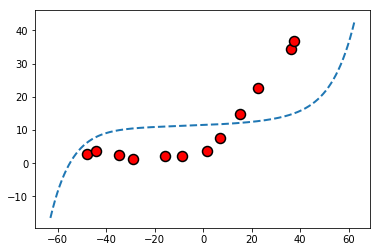

In [136]:
    min_x=np.min(X)
    max_x=np.max(X)
    
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)

    # Map the X values
    X_poly3 = polyFeatures(x, p)
    X_poly3 -= mu
    X_poly3 /= sigma

    # Add ones
    X_poly3 = np.concatenate([np.ones((x.shape[0], 1)), X_poly3], axis=1)

    # Plot
    pyplot.plot(x, np.dot(X_poly3, theta), '--', lw=2)
    pyplot.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')

In [ ]:
#not work
pyplot.plot(x,Xpoly.dot(theta),'--', lw=2)
pyplot.plot(X,y,'ro',ms=10)

In [157]:
error_train
m

12

1
2
3
4
5
6
7
8
9
10
11
12


''

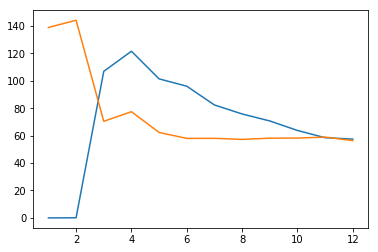

In [155]:
pyplot.figure()
error_train, error_val=learningCurve(Xpoly, y, Xpoly_val, yval, lambda_)
pyplot.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)
;




### 3.2 Adjusting the regularization parameter

In [161]:
#wybierz dobra lambde



array([ 2.13431051,  1.17325668, 34.35910918, 36.83795516,  2.80896507,
        2.12107248, 14.71026831,  2.61418439,  3.74017167,  3.73169131,
        7.62765885, 22.7524283 ])

In [194]:
def validationCurve(X, y, Xval, yval):

    # Selected values of lambda (you should not change this)
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

    # You need to return these variables correctly.
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))

    for i in range(0,len(lambda_vec)):
        lambda_=lambda_vec[i]

        theta=learn(X,y,lambda_)
        #theta = utils.trainLinearReg(linearRegCostFunction, X, y, lambda_=lambda_)
       
        error_train[i], _=linearRegCostFunction(X, y, theta, lambda_)
        error_val[i], _=linearRegCostFunction(Xval, yval, theta, lambda_)
    return lambda_vec, error_train, error_val

In [197]:
lambda_vec, error_train, error_val=validationCurve(Xpoly,y, Xpoly_val,yval)

lambda		Train Error	Validation Error
 0.000000	0.033313	72.519739
 0.001000	0.141285	9.193895
 0.003000	0.226783	8.853862
 0.010000	0.379813	13.824092
 0.030000	0.669203	12.832819
 0.100000	1.443448	8.102986
 0.300000	3.097416	5.813269
 1.000000	7.244073	7.486771
 3.000000	15.793216	10.248908
 10.000000	33.161293	19.167199


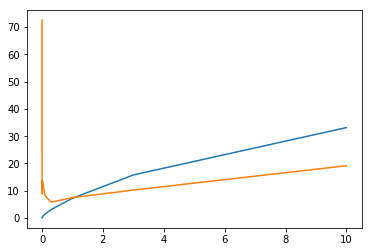

In [198]:
pyplot.plot(lambda_vec,error_train, lambda_vec, error_val);

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))